In [1]:
!hostname

amueller-tabpfn-4gpu


In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [3]:
import pandas as pd
previous_results = pd.read_csv("log/big_epoch77_permutations.csv", index_col=0)
previous_results

,mlp,distilled_tabpfn,distilled_tabpfn_ht,logreg,knn,rf,tabpfn,mlp_shallow,mlp_big,distilled_tabpfn_shallow,...,distilled_tabpfn_parameters_tuned_upsample_wrong_fit,distilled_tabpfn_parameters_tuned_upsample_per_batch,forward_linear,forward_mlp,forward_mlp_new,forward_mlp_new_label_permutation,forward_mlp_model_big_bugfix_caching,forward_mlp_model_big_bugfix_caching_permutations,big_epoch_77,big_epoch_77_permutations
breast-cancer,0.705165,0.719032,0.718443,0.694928,0.637934,0.683816,0.722461,0.710050,0.669491,0.712884,...,0.669577,0.712704,0.696557,0.651133,0.681793,0.690603,0.688895,0.688020,0.696291,0.696277
colic,0.885905,0.885719,0.885253,0.875698,0.847037,0.913075,0.894787,0.891158,0.861414,0.882956,...,0.864014,0.882314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dermatology,0.998480,NaN,NaN,0.998870,0.996039,0.999330,NaN,0.998577,0.998232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonar,0.934220,0.947244,0.947698,0.870630,0.897559,0.928207,0.947794,0.936975,0.906486,0.937920,...,0.930003,0.940401,0.864910,0.855627,0.862570,0.869392,0.866997,0.869279,0.868732,0.865493
glass,0.903652,0.905528,0.905942,0.881423,0.878902,0.944137,0.938821,0.879479,0.875131,0.847782,...,0.911967,0.926118,0.856450,0.846307,0.811603,0.880368,0.846599,0.859279,0.853173,0.872912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regime_alimentaire,0.949590,0.945944,0.945944,0.961458,0.901349,0.955579,0.927367,0.933262,0.953997,0.931992,...,0.924069,0.928346,0.873067,0.785393,0.898043,0.896978,0.886537,0.897711,0.917566,0.915333
iris-example,0.995333,0.997000,0.997000,0.997333,0.991500,0.995333,0.997000,0.991000,0.995000,0.991000,...,0.996333,0.996333,0.997000,0.998000,0.996000,0.998000,0.998000,0.997333,0.998000,0.998000
Touch2,0.973185,0.981328,0.981394,0.952478,0.949996,0.979879,0.988497,0.948442,0.972864,0.948922,...,0.980152,0.981755,0.915866,0.792470,0.856818,0.937941,0.918776,0.940685,0.925167,0.957213
penguins,0.999797,0.999797,0.999797,0.999797,0.999638,0.999152,0.999797,1.000000,0.999333,0.999841,...,0.999797,0.999797,0.999921,0.999514,0.999797,0.999841,0.999841,0.999841,0.999587,0.999841


In [4]:
from tabpfn.scripts.evaluate_baselines_sklearn import evaluate
from tabpfn.scripts.evaluate_mlps_sklearn import add_forward_mlp_model

In [5]:
models = add_forward_mlp_model("big_epoch_77_permutations", "models_diff/prior_diff_real_checkpoint_predict_mlp_attention_nlayer12_lr0001_multiclass_04_18_2023_21_31_58_n_0_epoch_77.cpkt", permutations=True)

In [6]:
new_results = evaluate(previous_results, models)

Number of datasets: 149


  0%|                                                                                                                                                                                                                                                 | 0/149 [00:00<?, ?it/s]

predicted hidden layer size  None


  1%|███▏                                                                                                                                                                                                                                     | 2/149 [00:03<04:26,  1.81s/it]

decoder output layer size  267786
Error:  Trying to create tensor with negative dimension -47: [294, -47]
Error:  Trying to create tensor with negative dimension -30: [292, -30]
Error:  Trying to create tensor with negative dimension -4: [228, -4]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:03<00:00, 37.60it/s]

Error:  Trying to create tensor with negative dimension -791: [1556, -791]
Error:  Trying to create tensor with negative dimension -12: [404, -12]
Error:  Trying to create tensor with negative dimension -2857: [421, -2857]
Error:  Trying to create tensor with negative dimension -29: [319, -29]
Error:  Trying to create tensor with negative dimension -40: [712, -40]


In [9]:
new_results.to_csv("log/big_epoch77_permutations.csv")

In [8]:
new_results.isna().sum()

mlp                                                     0
distilled_tabpfn                                        8
distilled_tabpfn_ht                                     8
logreg                                                  0
knn                                                     0
rf                                                      0
tabpfn                                                  8
mlp_shallow                                             0
mlp_big                                                 0
distilled_tabpfn_shallow                                8
distilled_tabpfn_big                                    8
distilled_tabpfn_big_dropout                            8
distilled_tabpfn_big_long                               8
distilled_tabpfn_big_long_dropout                       8
distilled_tabpfn_big_layernorm                          8
distilled_tabpfn_parameters_tuned                       8
distilled_tabpfn_parameters_tuned_upsample              3
tabpfn_32     

In [25]:
subset = ['mlp','logreg', 'knn', 'rf', 'tabpfn', 'tabpfn_mine', 'big_epoch_77', 'big_epoch_77_permutations', 'distilled_tabpfn_parameters_tuned']
bla  = new_results.dropna()[subset].stack().reset_index()
bla.columns = ['dataset_name', 'classifier_name', 'accuracy']
bla

,dataset_name,classifier_name,accuracy
0,breast-cancer,mlp,0.705165
1,breast-cancer,logreg,0.694928
2,breast-cancer,knn,0.637934
3,breast-cancer,rf,0.683816
4,breast-cancer,tabpfn,0.722461
...,...,...,...
1228,penguins,tabpfn,0.999797
1229,penguins,tabpfn_mine,0.999797
1230,penguins,big_epoch_77,0.999587
1231,penguins,big_epoch_77_permutations,0.999841


['mlp' 'logreg' 'knn' 'rf' 'tabpfn' 'tabpfn_mine' 'big_epoch_77'
 'big_epoch_77_permutations' 'distilled_tabpfn_parameters_tuned']
big_epoch_77                          6.0
big_epoch_77_permutations             5.0
distilled_tabpfn_parameters_tuned    11.0
knn                                   2.0
logreg                               12.0
mlp                                  12.0
rf                                   20.0
tabpfn                               17.0
tabpfn_mine                          32.0
dtype: float64
knn                                  7.481752
big_epoch_77                         5.678832
mlp                                  5.580292
logreg                               5.416058
big_epoch_77_permutations            5.018248
rf                                   4.813869
distilled_tabpfn_parameters_tuned    4.054745
tabpfn                               3.616788
tabpfn_mine                          3.339416
dtype: float64
('knn', 'tabpfn', 5.5548595713159326e-18, True)

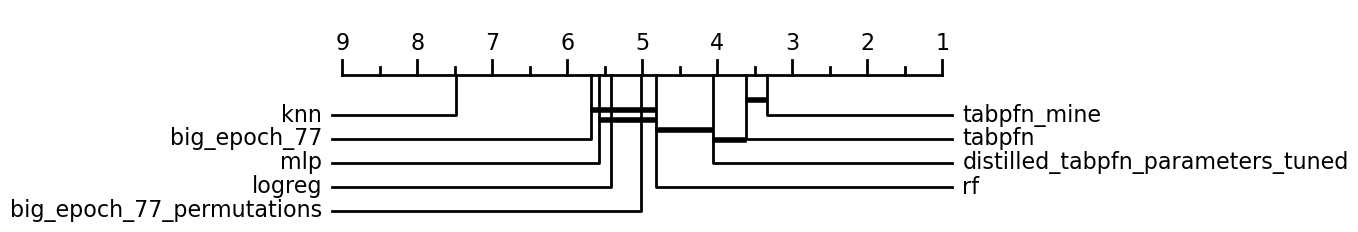

In [26]:
from tabpfn.scripts.critical_differences import draw_cd_diagram
res = draw_cd_diagram(bla, title="OVO ROC AUC")

In [52]:
import pandas as pd
results = pd.read_csv("sklearn_implementation_forward_mlp_model_big_bugfix_caching.csv", index_col=0)

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier




In [142]:
results

,mlp,distilled_tabpfn,distilled_tabpfn_ht,logreg,knn,rf,tabpfn,mlp_shallow,mlp_big,distilled_tabpfn_shallow,...,distilled_tabpfn_parameters_tuned,distilled_tabpfn_parameters_tuned_upsample,tabpfn_32,tabpfn_mine,tabpfn_mine_32,tabpfn_distilled_tuned_mine,distilled_tabpfn_parameters_tuned_upsample_wrong_fit,distilled_tabpfn_parameters_tuned_upsample_per_batch,forward_linear,forward_mlp
breast-cancer,0.705165,0.719032,0.718443,0.694928,0.637934,0.683816,0.722461,0.710050,0.669491,0.712884,...,0.727260,0.723659,0.723902,0.720337,0.718314,0.727260,0.669577,0.712704,0.696557,0.651133
colic,0.885905,0.885719,0.885253,0.875698,0.847037,0.913075,0.894787,0.891158,0.861414,0.882956,...,0.879458,0.880952,0.896212,0.897720,0.899814,0.879458,0.864014,0.882314,NaN,NaN
dermatology,0.998480,NaN,NaN,0.998870,0.996039,0.999330,NaN,0.998577,0.998232,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sonar,0.934220,0.947244,0.947698,0.870630,0.897559,0.928207,0.947794,0.936975,0.906486,0.937920,...,0.921612,0.923021,0.943153,0.957985,0.955668,0.921612,0.930003,0.940401,0.864910,0.855627
glass,0.903652,0.905528,0.905942,0.881423,0.878902,0.944137,0.938821,0.879479,0.875131,0.847782,...,0.936122,0.931284,0.941514,0.936975,0.940563,0.936122,0.911967,0.926118,0.856450,0.846307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regime_alimentaire,0.949590,0.945944,0.945944,0.961458,0.901349,0.955579,0.927367,0.933262,0.953997,0.931992,...,0.937027,0.926744,0.927580,0.936719,0.930469,0.937027,0.924069,0.928346,0.873067,0.785393
iris-example,0.995333,0.997000,0.997000,0.997333,0.991500,0.995333,0.997000,0.991000,0.995000,0.991000,...,0.995667,0.996000,0.997000,0.997000,0.997000,0.995667,0.996333,0.996333,0.997000,0.998000
Touch2,0.973185,0.981328,0.981394,0.952478,0.949996,0.979879,0.988497,0.948442,0.972864,0.948922,...,0.985752,0.984074,0.990170,0.988677,0.990548,0.985752,0.980152,0.981755,0.915866,0.792470
penguins,0.999797,0.999797,0.999797,0.999797,0.999638,0.999152,0.999797,1.000000,0.999333,0.999841,...,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999797,0.999921,0.999514


['mlp' 'distilled_tabpfn' 'logreg' 'knn' 'rf' 'tabpfn'
 'distilled_tabpfn_parameters_tuned' 'tabpfn_32' 'tabpfn_mine'
 'tabpfn_mine_32' 'forward_linear' 'forward_mlp' 'forward_mlp_new'
 'forward_mlp_new_label_permutation'
 'forward_mlp_model_big_bugfix_caching'
 'forward_mlp_model_big_bugfix_caching_permutations']
distilled_tabpfn                                      9.0
distilled_tabpfn_parameters_tuned                     8.0
forward_linear                                        6.0
forward_mlp                                           4.0
forward_mlp_model_big_bugfix_caching                  0.0
forward_mlp_model_big_bugfix_caching_permutations     2.0
forward_mlp_new                                       3.0
forward_mlp_new_label_permutation                     3.0
knn                                                   2.0
logreg                                                9.0
mlp                                                   9.0
rf                                            

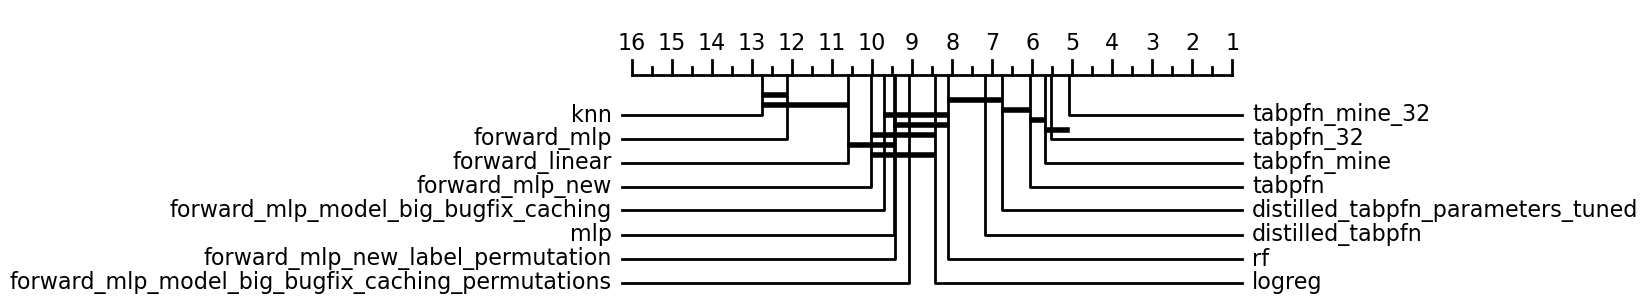

In [92]:
from tabpfn.scripts.critical_differences import draw_cd_diagram

res = draw_cd_diagram(bla, title="OVO ROC AUC")

In [127]:
results.model.replace({'distilled_tabpfn_parameters_tuned': 'distilled tabpfn', 'distilled_tabpfn_quick': 'distilled tabpfn (short training)', 'tabpfn_mine': 'tabpfn (3 permutations)', 'tabpfn_mine_32': 'tabpfn (32 permutations)'}, inplace=True)